## **PROJECT PROPOSAL TO PREDICT CREDIT CARD APPROVAL**

1.
Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?  

My proposal is important in today's world because it can help banks to mitigate the risk of bad loans, 
 which can lead to financial instability.Predicting a good client is worthy for a bank because it allows them to allocate their resources effectively, 
 approve loans with confidence, and potentially increase their profitability. With the use of machine learning algorithms,
it is possible to analyze vast amounts of data and identify patterns that can help banks make better decisions about which clients to lend to.

**2.How is it going to impact the banking sector?**

Implementing machine learning algorithms to predict good clients can have a significant impact on the banking sector. It can help banks to reduce the risk #of bad loans and defaulters, which can lead to financial instability. By using these algorithms, banks can more accurately assess a borrower's creditworthiness and make better lending decisions. This can lead to more efficient use of resources, higher profitability, and improved customer satisfaction. Additionally, banks can use this technology to identify potential fraud and reduce their exposure to financial crimes. Overall, the adoption of machine learning in the banking sector can lead to a more stable and profitable industry.

**3.If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.**

One potential gap in knowledge could be the lack of specific data on Indian clients that can be used to train the machine learning algorithms effectively. However, with appropriate data collection and cleaning methods, the proposed method can be helpful for banks in India to identify good clients, reduce risks, and improve their overall lending practices.

# Features in both given Credit card AND  credit card label datasets and understanding of features;




Features name: (Credit_Card.csv)

*Ind_ID*: Client ID,
*Gender*: Gender information,
*Car_owner*: Having car or not,
*Propert_owner*: Having property or not,
*Children*: Count of children,
*Annual_inco*me: Annual income,
*Type_Income*: Income type,
*Education:* Education level,
*Marital_status:* Marital_status,
*Housing_type: *Living style,
*Birthday_count:* Use backward count from current day (0), -1 means yesterday.

*Employed_days*: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

*Mobile_phone*: Any mobile phone,
*Work_phone:* Any work phone,
*Phone:* Any phone number,
*EMAIL_ID:* Any email ID,
*Type_Occupation:* Occupation,
*Family_Members:* Family size 

Another data set (*Credit_card_label*.csv) contains two key pieces of information 

*ID*: The joining key between application data and credit status data, same is Ind_ID

*Label:* 0 is application approved and 1 is application rejected. 



In [3]:
# importing all the libraries for the dataset
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib. pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
!pip install fancyimpute
from matplotlib.pyplot import figure
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
data1=pd.read_csv("/content/Credit_card.csv")
data1


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [5]:
data2=pd.read_csv("/content/Credit_card_label.csv")
data2


,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [6]:
df=pd.merge(data1,data2)# merging two data sets into one using merge
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [7]:
newdf=df.copy()
newdf

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


**DATA ANALYSIS**

In [8]:
newdf.shape

(1548, 19)

In [9]:
df['Type_Occupation'].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [10]:
df['Ind_ID'].unique()

array([5008827, 5009744, 5009746, ..., 5115992, 5118219, 5053790])

In [11]:
df['GENDER'].unique()

array(['M', 'F', nan], dtype=object)

In [12]:
df['Car_Owner'].unique()

array(['Y', 'N'], dtype=object)

In [13]:
df['Propert_Owner'].unique()

array(['Y', 'N'], dtype=object)

In [14]:
df['CHILDREN'].unique()

array([ 0,  1,  2,  4,  3, 14])

In [15]:
df['Annual_income'].unique()

array([ 180000. ,  315000. ,       nan,  450000. ,   90000. ,  472500. ,
        270000. ,  126000. ,  202500. ,  157500. ,  112500. ,  540000. ,
        292500. ,  135000. ,   76500. ,  215100. ,  225000. ,   67500. ,
        171000. ,  103500. ,   99000. ,  391500. ,   65250. ,   72900. ,
        360000. ,  256500. ,  675000. ,  247500. ,   85500. ,  121500. ,
        130500. ,  211500. ,   81000. ,   72000. ,  148500. ,  162000. ,
        195750. ,  585000. ,  216000. ,  306000. ,  108000. ,   63000. ,
         45000. ,  337500. ,  131400. ,  117000. ,  445500. ,  234000. ,
       1575000. ,  144000. ,   67050. ,   73350. ,  193500. ,  900000. ,
         94500. ,  198000. ,   54000. ,  166500. ,  167400. ,  153000. ,
        423000. ,  243000. ,  283500. ,  252000. ,  495000. ,  612000. ,
         36000. ,  139500. ,  133650. ,  427500. ,  261000. ,  231750. ,
         90900. ,   45900. ,  119250. ,   58500. ,  328500. ,  787500. ,
        594000. ,  119700. ,   69372. ,   37800. , 

In [16]:
df['Type_Income'].unique()

array(['Pensioner', 'Commercial associate', 'Working', 'State servant'],
      dtype=object)

In [17]:
df['EDUCATION'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [18]:
df['Marital_status'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [19]:
df['Housing_type'].unique()

array(['House / apartment', 'With parents', 'Rented apartment',
       'Municipal apartment', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [20]:
df['Birthday_count'].unique()

array([-18772., -13557.,     nan, ..., -10229., -15292., -16601.])

In [21]:
df['Employed_days'].unique()

array([365243,   -586,   -678,  -1002,   -913,   -248,  -2470,  -1644,
        -4327,  -1674,  -1086,   -925,   -854,   -185,  -3350,   -691,
        -4770,  -2394,   -384,  -3647,  -1546,   -808,  -1285,   -855,
        -7369,  -2269,  -4114,  -1161,  -7288,   -166,   -866,   -564,
        -3366,  -2150,  -1458,  -8369,   -508,  -1567,   -137,  -3974,
        -1570,  -2878,   -140,  -2576,  -1905,  -1724,  -1328,  -4987,
        -3496,  -1394,  -1265,  -2531,  -2105,   -860,   -217,   -535,
        -6866,   -584,  -2227,  -8161,   -613,   -606,  -6944,   -346,
        -1808,  -3420,   -863,  -7413,  -7553,  -3931,  -1039,   -134,
         -622,  -1595,  -1626,  -1868,   -555,  -1935,   -931,   -900,
        -4305,   -499,  -2418,   -189,  -1132,  -1770,   -919,  -1081,
         -502,  -2420,  -1325,  -6367,  -2484,   -341,  -9422,  -3054,
        -2987,  -2128,   -820,   -141,  -1692,  -4686,   -693,   -567,
         -885,  -2769,  -1547,  -3179,  -5204,  -3072,   -320,  -2469,
      

In [22]:
df['Mobile_phone'].unique()

array([1])

In [23]:
df['label'].unique()

array([1, 0])

In [24]:
newdf.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [25]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

*Here there are null values in the columns from above info also dropping some irrelavant columns below which are not used for predicting the credit card approval*

In [26]:
newdf.drop(["CHILDREN","Marital_status","Work_Phone","Phone","EMAIL_ID","Family_Members","Type_Occupation"],axis=1,inplace=True)

In [27]:
newdf.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1548 non-null   int64  
 1   GENDER          1541 non-null   object 
 2   Car_Owner       1548 non-null   object 
 3   Propert_Owner   1548 non-null   object 
 4   Annual_income   1525 non-null   float64
 5   Type_Income     1548 non-null   object 
 6   EDUCATION       1548 non-null   object 
 7   Housing_type    1548 non-null   object 
 8   Birthday_count  1526 non-null   float64
 9   Employed_days   1548 non-null   int64  
 10  Mobile_phone    1548 non-null   int64  
 11  label           1548 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 157.2+ KB


In [28]:
newdf.isnull().sum()

Ind_ID             0
GENDER             7
Car_Owner          0
Propert_Owner      0
Annual_income     23
Type_Income        0
EDUCATION          0
Housing_type       0
Birthday_count    22
Employed_days      0
Mobile_phone       0
label              0
dtype: int64

**There are missing values in gender,annual income and birthday income**

In [29]:
newdf.describe()#summarization of dataset

,Ind_ID,Annual_income,Birthday_count,Employed_days,Mobile_phone,label
count,1.548000e+03,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000
mean,5.078920e+06,1.913993e+05,-16040.342071,59364.689922,1.0,0.113049
std,4.171759e+04,1.132530e+05,4229.503202,137808.062701,0.0,0.316755
min,5.008827e+06,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000
25%,5.045070e+06,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000
50%,5.078842e+06,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000
75%,5.115673e+06,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000
max,5.150412e+06,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000


In [30]:
newdf.shape

(1548, 12)

**MISSING VALUES IN PLOTTING**

<Axes: >

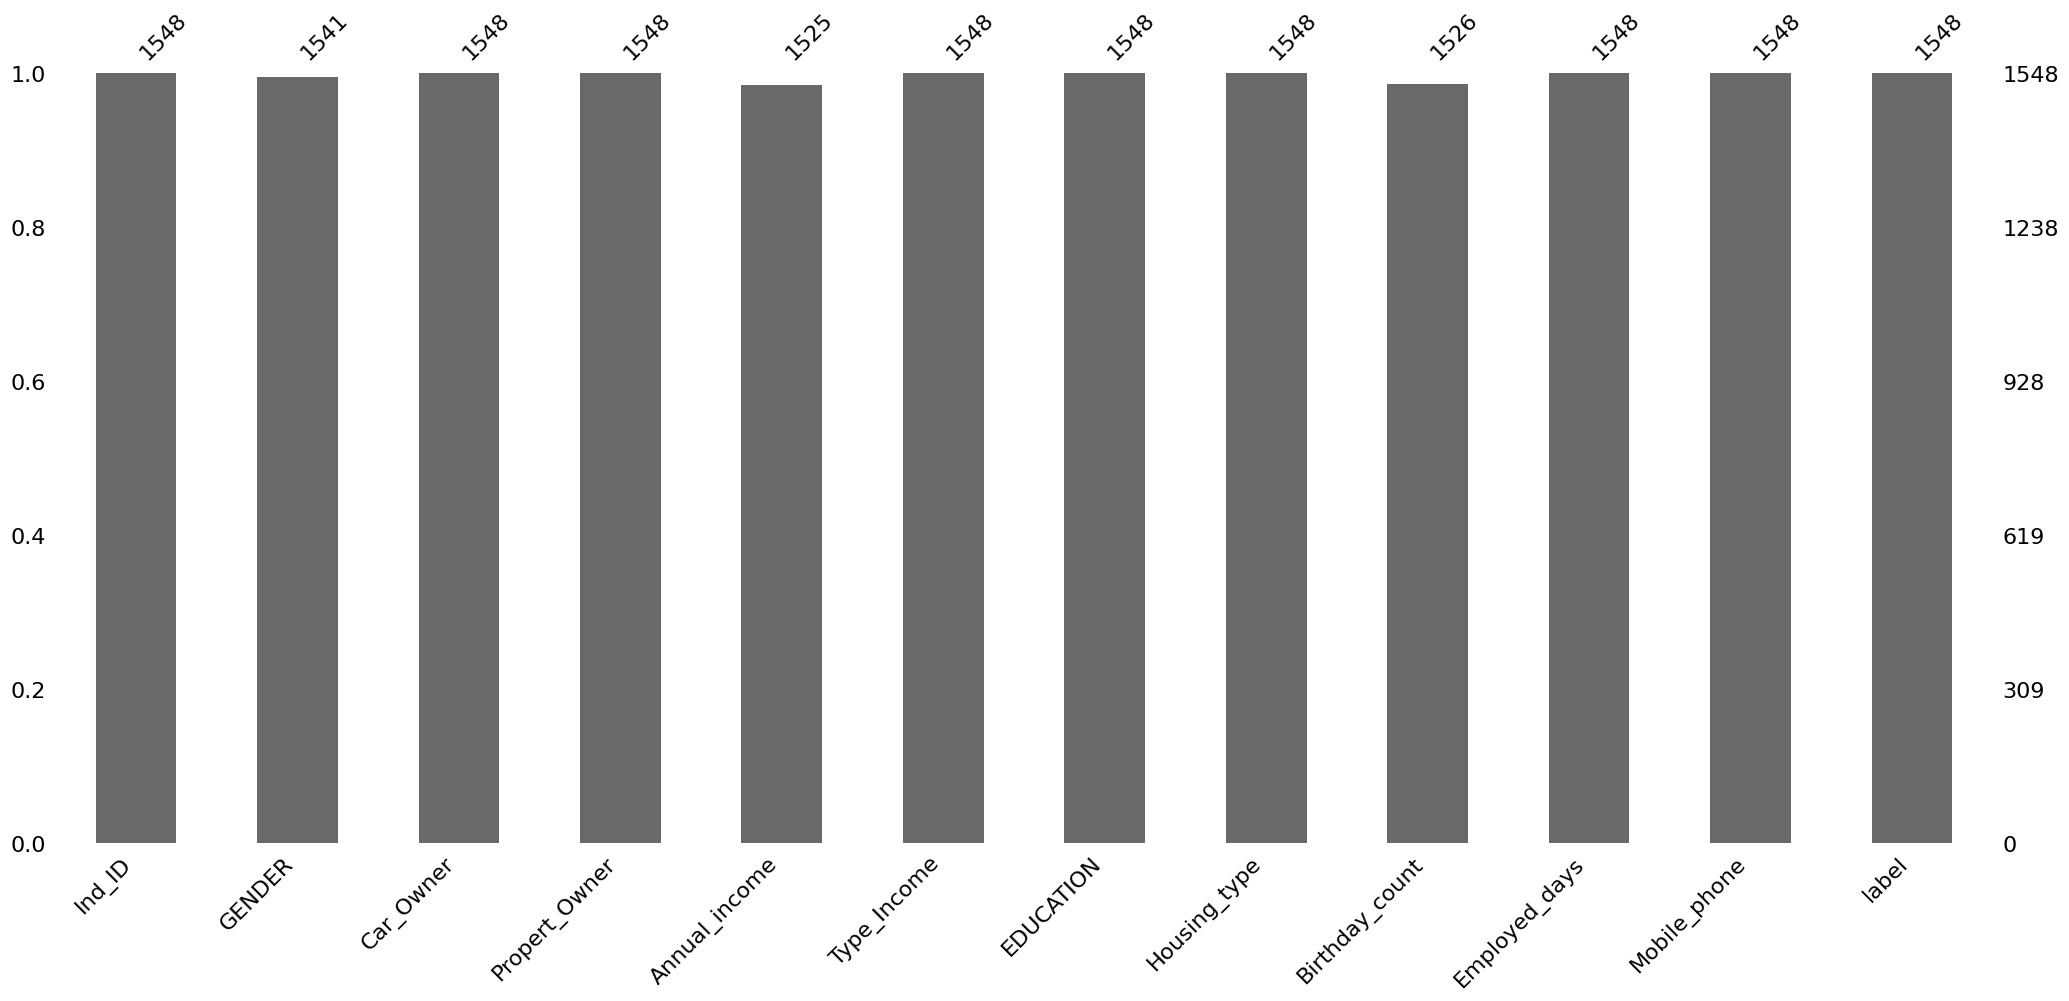

In [31]:
msno.bar(newdf.sample(1548))

<Axes: >

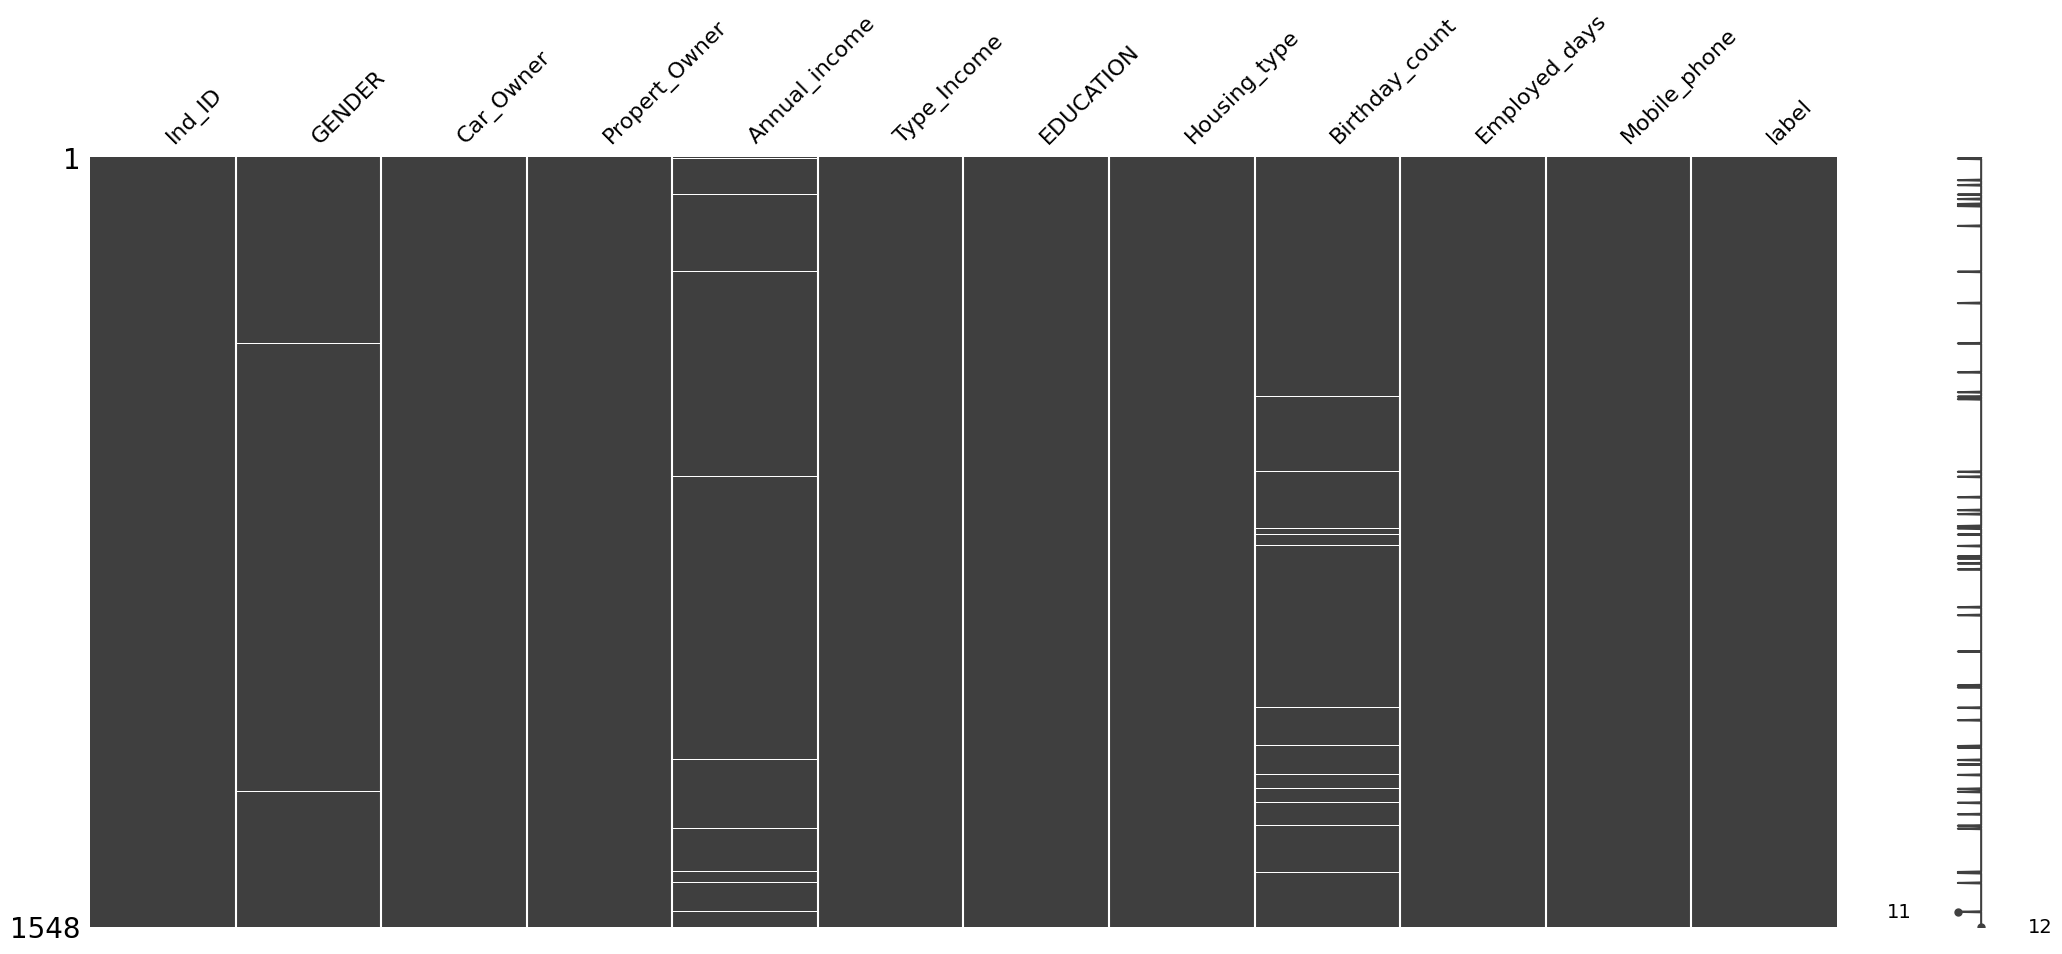

In [32]:
msno.matrix(newdf.sample(1548))

**THE MISSING of one variable IS NOT DEPEND UPON on the other VARIABLES**.Hence it is MCAR missing completly at random.

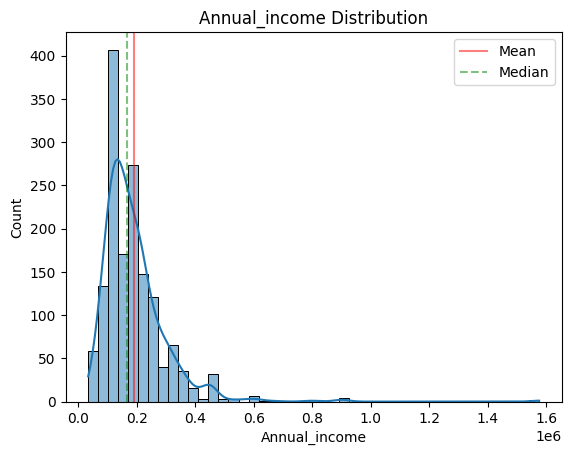

In [33]:
Annualincome=newdf['Annual_income']# Bmi distribution
sns.histplot(data =newdf['Annual_income'],bins=45, kde = True) # creating histogram with density plot
plt.axvline(x=Annualincome.mean(),color='red',alpha=0.5,label='Mean') # adding vertical line as mean
plt.axvline(x=Annualincome.median(),c='green',ls='--',alpha=0.5,label='Median') # adding vertical line as median
plt.title("Annual_income Distribution")
plt.legend() # adding legend

**From the above plot i observed it is right skewed data**

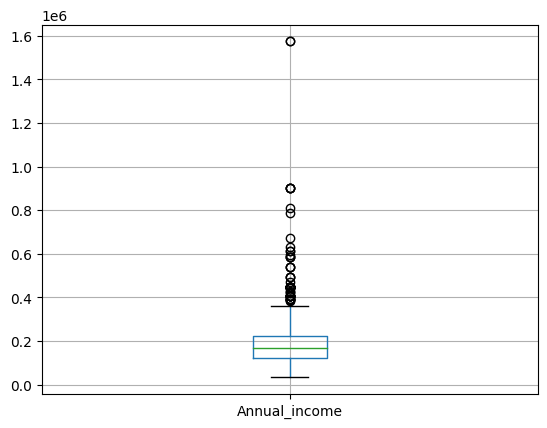

In [34]:
newdf.boxplot(column=['Annual_income'])
plt.show()

**Valid outputs**

In [35]:
inc1=newdf['Annual_income']
inc1

0       180000.0
1       315000.0
2       315000.0
3            NaN
4       315000.0
          ...   
1543         NaN
1544    225000.0
1545    180000.0
1546    270000.0
1547    225000.0
Name: Annual_income, Length: 1548, dtype: float64

**Here I am doing log transformation on annual income to convert the skewed distribution to a normal distribution**

In [36]:
newdf.nunique()

Ind_ID            1548
GENDER               2
Car_Owner            2
Propert_Owner        2
Annual_income      115
Type_Income          4
EDUCATION            5
Housing_type         6
Birthday_count    1270
Employed_days      956
Mobile_phone         1
label                2
dtype: int64

In [37]:
df['logincome']= np.log(newdf['Annual_income'])
df['logincome']

0       12.100712
1       12.660328
2       12.660328
3             NaN
4       12.660328
          ...    
1543          NaN
1544    12.323856
1545    12.100712
1546    12.506177
1547    12.323856
Name: logincome, Length: 1548, dtype: float64

In [38]:
df['logincome'].skew()

0.20152944215616836

<ipython-input-39-7b2434e6b624>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['logincome'])# after log transformation


<Axes: xlabel='logincome', ylabel='Density'>

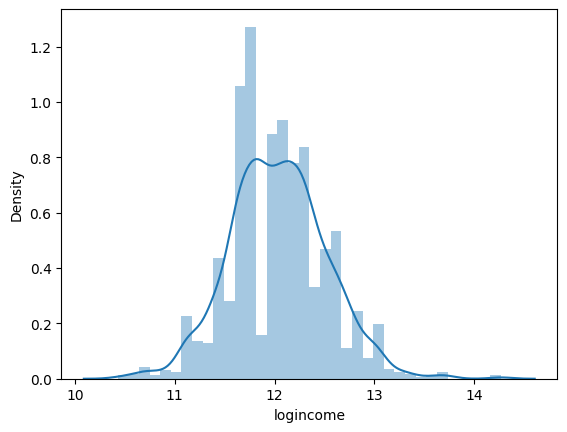

In [39]:
sns.distplot(df['logincome'])# after log transformation 

**# sqrt transformation also i tried here but i choose log transformation because of its good normal distribution**

In [40]:
df['sqrtincome'] = np.sqrt(df['Annual_income'])

In [41]:
df['sqrtincome'] .skew()

1.4311248332328896

<ipython-input-42-f18273095627>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqrtincome'])


<Axes: xlabel='sqrtincome', ylabel='Density'>

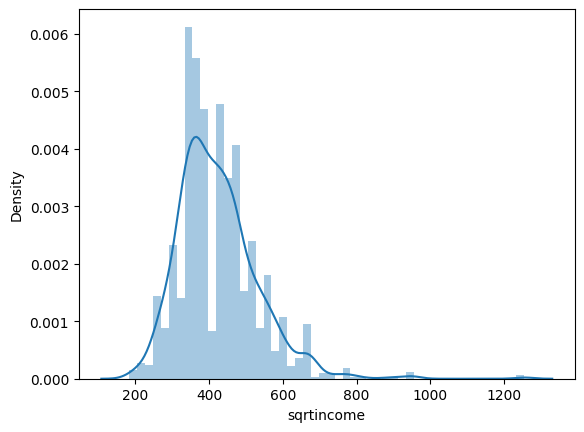

In [42]:
sns.distplot(df['sqrtincome'])

**Here i did boxcox or power transformation to convert the skewed data/skewed distribution  to normal distribution but used log transformation **

In [43]:
from scipy.stats import boxcox

# Box-Cox Transformation in Python
newdf.insert(len(newdf.columns), 'A_Boxcox', 
              boxcox(newdf.iloc[:, 4])[0])

<ipython-input-44-83f5f7e3d805>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf['Annual_income'])


<Axes: xlabel='Annual_income', ylabel='Density'>

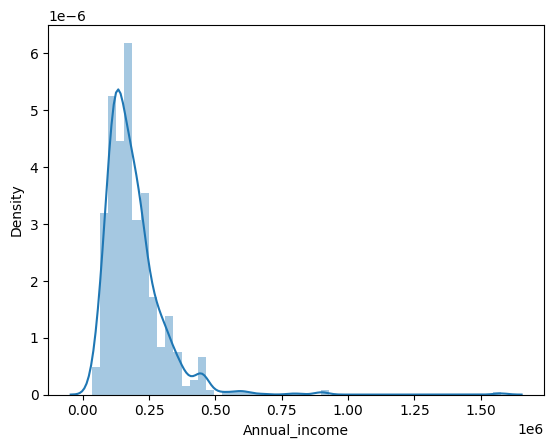

In [44]:
sns.distplot(newdf['Annual_income'])

**Dealing with Numerical data outliers**

**Annual_income Outliers:Right skewed,
To make it normalised I used all transformations like log,sqrt and Power/boxcox Transformation but  Among all Log transformation gave best normalised data.So,I will use log transformation data.

 **

In [45]:
ny=newdf.drop(['A_Boxcox'],axis=1,inplace=True)
ny


In [46]:
newdf.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Housing_type,Birthday_count,Employed_days,Mobile_phone,label
0,5008827,M,Y,Y,180000.0,Pensioner,Higher education,House / apartment,-18772.0,365243,1,1
1,5009744,F,Y,N,315000.0,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1
2,5009746,F,Y,N,315000.0,Commercial associate,Higher education,House / apartment,NaN,-586,1,1
3,5009749,F,Y,N,NaN,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1
4,5009752,F,Y,N,315000.0,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1


In [47]:
newdf.insert(len(newdf.columns), 'logincome', 
              boxcox(newdf.iloc[:, 4])[0])

In [48]:
newdf.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Housing_type,Birthday_count,Employed_days,Mobile_phone,label,logincome
0,5008827,M,Y,Y,180000.0,Pensioner,Higher education,House / apartment,-18772.0,365243,1,1,3.939032e+43
1,5009744,F,Y,N,315000.0,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1,4.512745e+45
2,5009746,F,Y,N,315000.0,Commercial associate,Higher education,House / apartment,NaN,-586,1,1,4.512745e+45
3,5009749,F,Y,N,NaN,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1,NaN
4,5009752,F,Y,N,315000.0,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1,4.512745e+45


In [49]:
newdf.drop(['Annual_income'],axis=1,inplace=True)#since we have normalised the annual income we delete the annual_income  

In [50]:
newdf.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Housing_type,Birthday_count,Employed_days,Mobile_phone,label,logincome
0,5008827,M,Y,Y,Pensioner,Higher education,House / apartment,-18772.0,365243,1,1,3.939032e+43
1,5009744,F,Y,N,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1,4.512745e+45
2,5009746,F,Y,N,Commercial associate,Higher education,House / apartment,NaN,-586,1,1,4.512745e+45
3,5009749,F,Y,N,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1,NaN
4,5009752,F,Y,N,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1,4.512745e+45


In [51]:
newdf.skew()#previous with annual income

<ipython-input-51-6b0dec8ccac4>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  newdf.skew()#previous with annual income


Ind_ID             0.072346
Birthday_count    -0.171087
Employed_days      1.770964
Mobile_phone       0.000000
label              2.446379
logincome         27.579473
dtype: float64

In [52]:
ncreditcard=newdf['label']
ncreditcard

0       1
1       1
2       1
3       1
4       1
       ..
1543    0
1544    0
1545    0
1546    0
1547    0
Name: label, Length: 1548, dtype: int64

In [53]:
ncreditcard.value_counts()# approvd=1373.not approved=175

0    1373
1     175
Name: label, dtype: int64

**Credit card approvals are more than disapproval**

In [54]:
newdf.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Housing_type,Birthday_count,Employed_days,Mobile_phone,label,logincome
0,5008827,M,Y,Y,Pensioner,Higher education,House / apartment,-18772.0,365243,1,1,3.939032e+43
1,5009744,F,Y,N,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1,4.512745e+45
2,5009746,F,Y,N,Commercial associate,Higher education,House / apartment,NaN,-586,1,1,4.512745e+45
3,5009749,F,Y,N,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1,NaN
4,5009752,F,Y,N,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1,4.512745e+45


**DATA VISUALIZATION**

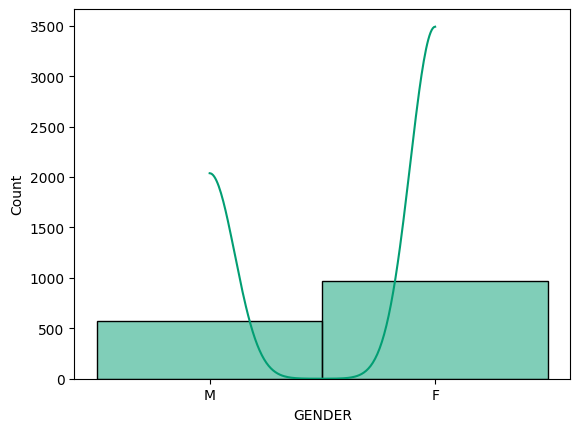

In [55]:
sns.histplot(newdf["GENDER"],kde=True, color= sns.color_palette('colorblind')[2])
plt.show()

**FEMALES ARE MORE THAN MALES**

<Axes: >

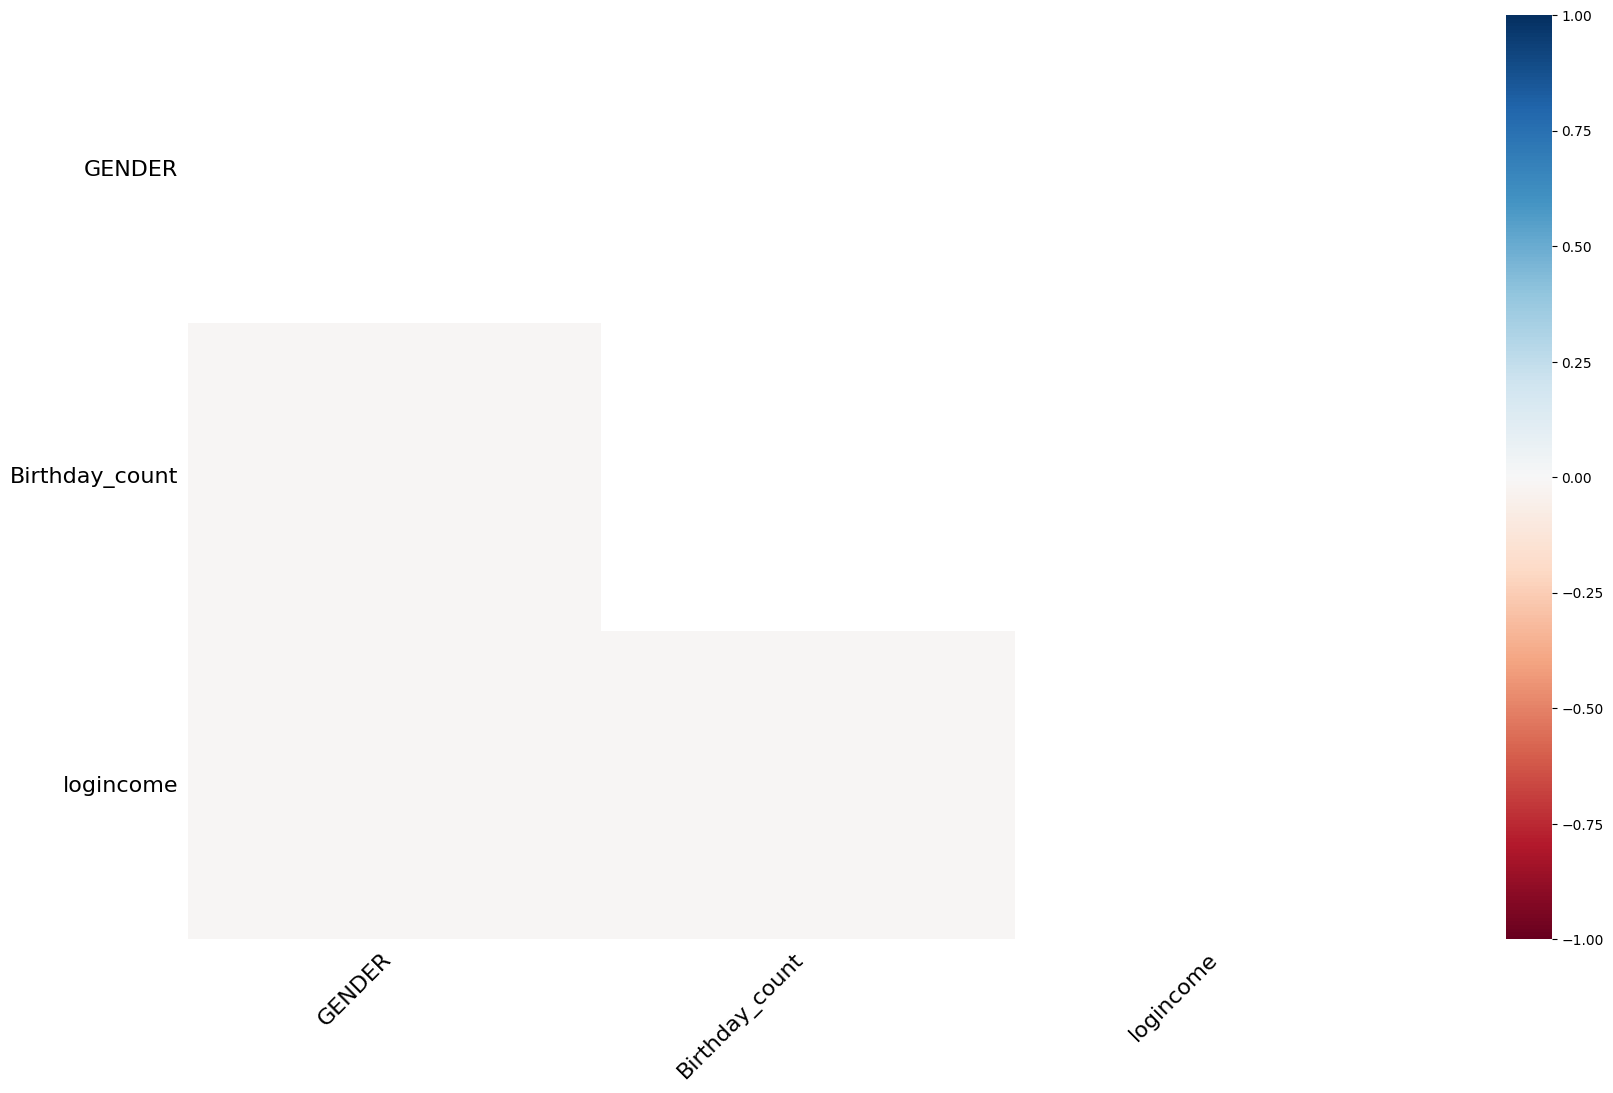

In [56]:
msno.heatmap(newdf)

**We dont see much RELATION i.e  NO-correlation between variables**

In [57]:
newdf.corr()

<ipython-input-57-a1bcabb2cad6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  newdf.corr()


,Ind_ID,Birthday_count,Employed_days,Mobile_phone,label,logincome
Ind_ID,1.000000,0.022909,-0.055396,NaN,0.016796,0.056034
Birthday_count,0.022909,1.000000,-0.619039,NaN,-0.045097,0.051267
Employed_days,-0.055396,-0.619039,1.000000,NaN,0.031408,-0.016592
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN
label,0.016796,-0.045097,0.031408,NaN,1.000000,-0.012897
logincome,0.056034,0.051267,-0.016592,NaN,-0.012897,1.000000


<ipython-input-58-c56a0ee5b0c7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(newdf.corr(), vmin=-1, vmax=1, annot=True)


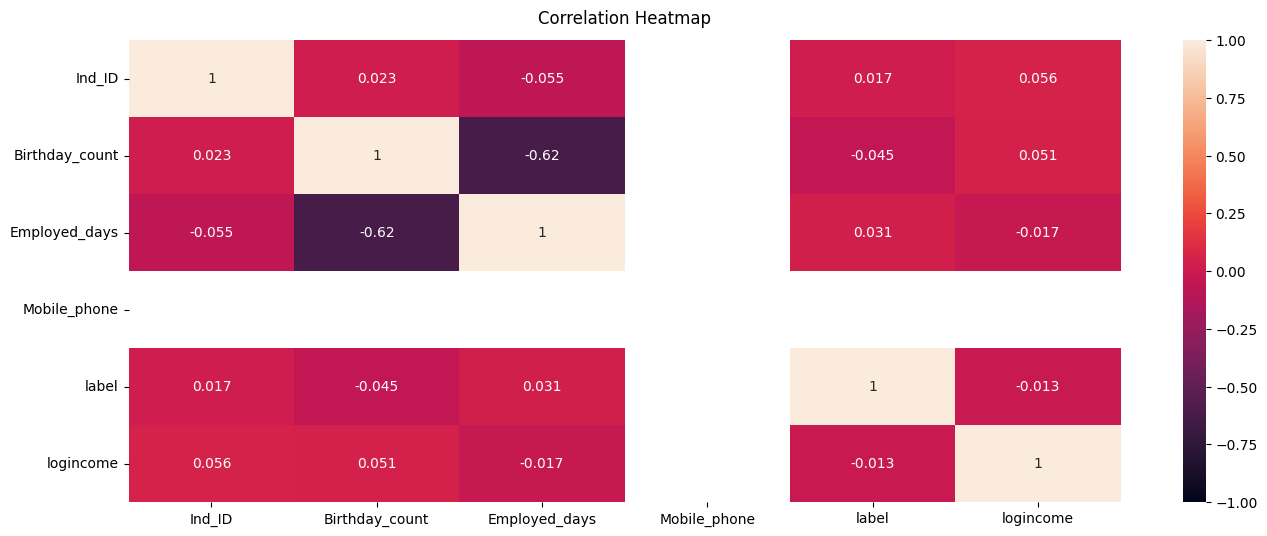

In [58]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(newdf.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [59]:
newdf['GENDER'].value_counts()

F    973
M    568
Name: GENDER, dtype: int64

**FEMALES are more than MALES**

In [60]:
newdf.tail(2)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Housing_type,Birthday_count,Employed_days,Mobile_phone,label,logincome
1546,5118219,M,Y,N,Working,Secondary / secondary special,House / apartment,-15292.0,-645,1,0,1.222527e+45
1547,5053790,F,Y,Y,Working,Higher education,House / apartment,-16601.0,-2859,1,0,2.608701e+44


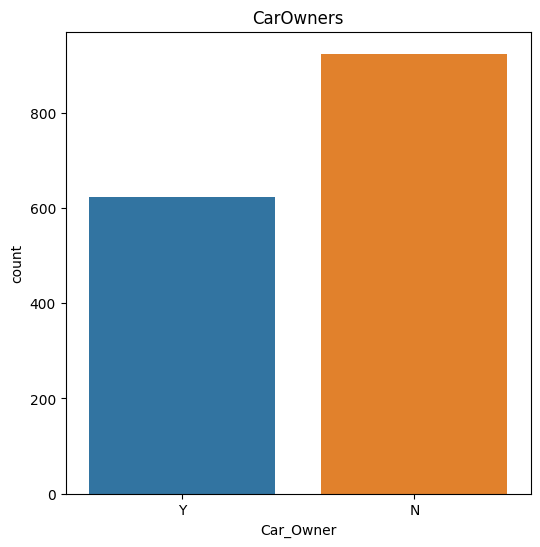

In [61]:
plt.figure(figsize=(6,6))
sns.countplot(x='Car_Owner',data=newdf)
plt.title("CarOwners")
plt.show()

In [62]:
newdf['Car_Owner'].value_counts()

N    924
Y    624
Name: Car_Owner, dtype: int64

The people who have own cars are less in number 

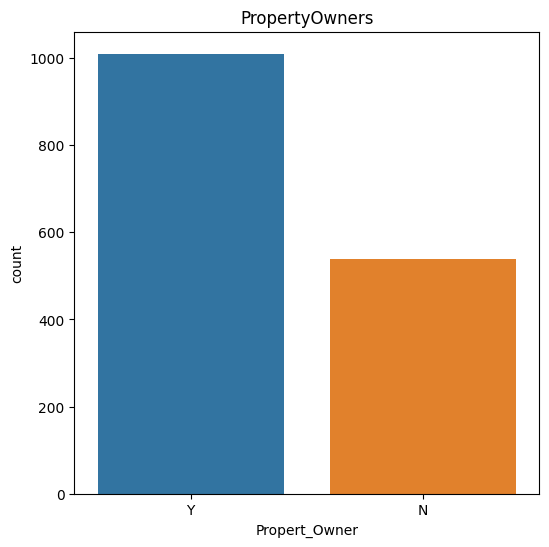

In [63]:
plt.figure(figsize=(6,6))
sns.countplot(x='Propert_Owner',data=newdf)
plt.title("PropertyOwners")
plt.show()

The people who have own properties are more in number.

In [64]:
newdf['Propert_Owner'].value_counts()

Y    1010
N     538
Name: Propert_Owner, dtype: int64

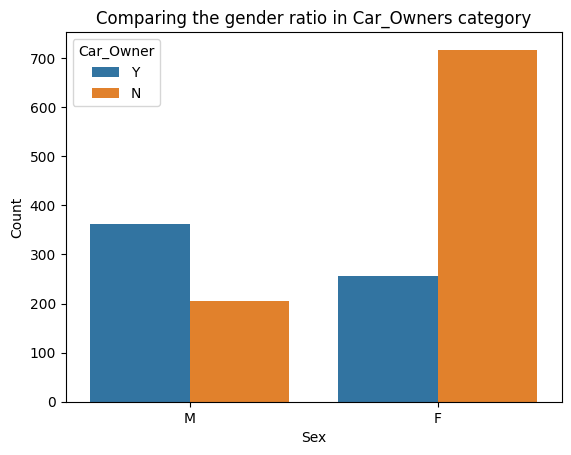

In [65]:
sns.countplot(data=newdf, x="GENDER", hue="Car_Owner")
plt.title("Comparing the gender ratio in Car_Owners category")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

**Male Car_Owners are Female car owners**

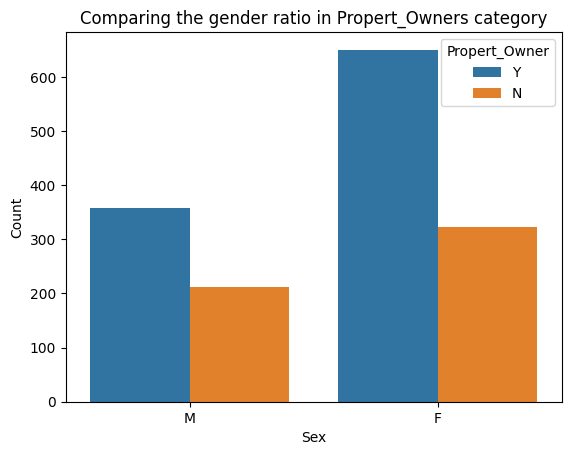

In [66]:
sns.countplot(data=newdf, x="GENDER", hue="Propert_Owner")
plt.title("Comparing the gender ratio in Propert_Owners category")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

**Female Property owners are more than male property owners**

(20.951999999999998, 25.7]    0.031654
(25.7, 30.4]                  0.124031
(30.4, 35.1]                  0.141473
(35.1, 39.8]                  0.114341
(39.8, 44.5]                  0.134367
(44.5, 49.2]                  0.117571
(49.2, 53.9]                  0.083979
(53.9, 58.6]                  0.114987
(58.6, 63.3]                  0.083979
(63.3, 68.0]                  0.039406
Name: Age, dtype: float64


<Axes: ylabel='Frequency'>

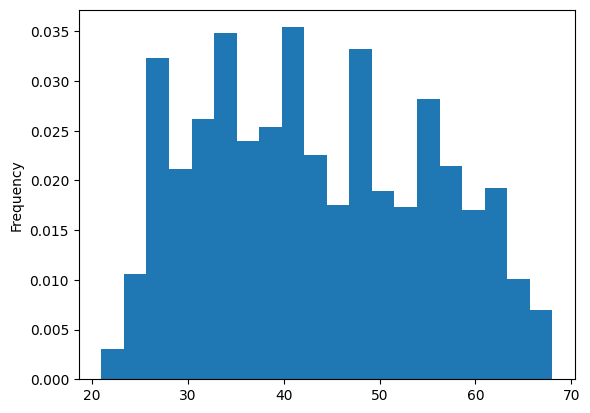

In [67]:
newdf['Age']=-(newdf['Birthday_count'])//365	
print(newdf['Age'].value_counts(bins=10,normalize=True,sort=False))
newdf['Age'].plot(kind='hist',bins=20,density=True)

In [68]:
newdf.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Housing_type,Birthday_count,Employed_days,Mobile_phone,label,logincome,Age
0,5008827,M,Y,Y,Pensioner,Higher education,House / apartment,-18772.0,365243,1,1,3.939032e+43,51.0
1,5009744,F,Y,N,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1,4.512745e+45,37.0
2,5009746,F,Y,N,Commercial associate,Higher education,House / apartment,NaN,-586,1,1,4.512745e+45,NaN
3,5009749,F,Y,N,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1,NaN,37.0
4,5009752,F,Y,N,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1,4.512745e+45,37.0


**I converted the birthcount to age using above formula to know the frequency distribution of Age of all the people **

In [69]:
fig = px.histogram(newdf,
                  x = "label",
                  marginal = 'box', 
                   color="Type_Income",
                  title = "Creditcard approved over type Income ")
fig.update_layout(bargap=0.2)
fig.show()

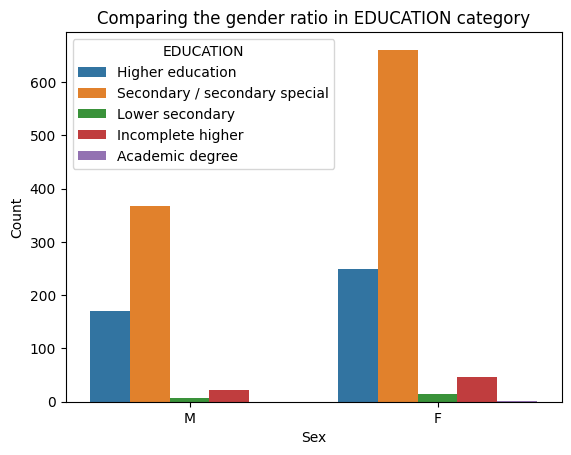

In [70]:
sns.countplot(data=newdf, x="GENDER", hue="EDUCATION")
plt.title("Comparing the gender ratio in EDUCATION category")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

**FEMALES ARE MORE IN NUMBER IN EDUCATED CATEGORY THAN MALES**

In [71]:
fig = px.histogram(newdf,
                  x = "label",
                  marginal = 'box', 
                   color="GENDER",
                  title = "Creditcard approved OVER Gender ")
fig.update_layout(bargap=0.2)
fig.show()

In [72]:
newdf.drop(['logincome','Ind_ID'],axis=1,inplace=True)

In [73]:
newdf.head()

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Housing_type,Birthday_count,Employed_days,Mobile_phone,label,Age
0,M,Y,Y,Pensioner,Higher education,House / apartment,-18772.0,365243,1,1,51.0
1,F,Y,N,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1,37.0
2,F,Y,N,Commercial associate,Higher education,House / apartment,NaN,-586,1,1,NaN
3,F,Y,N,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1,37.0
4,F,Y,N,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1,37.0


In [74]:
newdf.corr()

<ipython-input-74-a1bcabb2cad6>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Birthday_count,Employed_days,Mobile_phone,label,Age
Birthday_count,1.000000,-0.619039,NaN,-0.045097,-0.999685
Employed_days,-0.619039,1.000000,NaN,0.031408,0.618492
Mobile_phone,NaN,NaN,NaN,NaN,NaN
label,-0.045097,0.031408,NaN,1.000000,0.044595
Age,-0.999685,0.618492,NaN,0.044595,1.000000


In [75]:
newdf.label.corr(newdf.Birthday_count)

-0.04509737676780824

In [76]:
newdf.label.corr(newdf.Employed_days)

0.03140829363314299

In [77]:
GENDER_values = {'M': 1, 'F': 0}
gender_numeric = newdf.GENDER.map(GENDER_values )

In [78]:
newdf.label.corr(gender_numeric)# correlation for gender and credit card approval

0.05298129308490286

In [79]:
newdf.head(1)

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Housing_type,Birthday_count,Employed_days,Mobile_phone,label,Age
0,M,Y,Y,Pensioner,Higher education,House / apartment,-18772.0,365243,1,1,51.0


**We need to do Encoding  (categorical data to numerical data)because fancy imputer will accept only numerical values to deal with missing values**

In [80]:
newdf['GENDER'] = newdf.GENDER.map({'M': 0, 'F':1})
newdf['Car_Owner'] = newdf.Car_Owner.map({'N': 0, 'Y':1})
newdf['Propert_Owner'] = newdf.Propert_Owner.map({'N': 0, 'Y':1})
newdf['Type_Income'] = newdf.Type_Income.map({'Pensioner':0, 'Commercial associate':1, 'Working':2, 'State servant':3})                                          
newdf['EDUCATION'] = newdf.EDUCATION.map({'Higher education': 0,'Secondary / secondary special':1,
                                              'Lower secondary':2,'Incomplete higher':3,'Academic degree':4})
newdf['Housing_type']=newdf.Housing_type.map({'House / apartment':0,'With parents':1,'Rented apartment':2,  'Municipal apartment':3,
                                              'Co-op apartment':4,'Office apartment':5})


In [81]:
newdf

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Housing_type,Birthday_count,Employed_days,Mobile_phone,label,Age
0,0.0,1,1,0,0,0,-18772.0,365243,1,1,51.0
1,1.0,1,0,1,0,0,-13557.0,-586,1,1,37.0
2,1.0,1,0,1,0,0,NaN,-586,1,1,NaN
3,1.0,1,0,1,0,0,-13557.0,-586,1,1,37.0
4,1.0,1,0,1,0,0,-13557.0,-586,1,1,37.0
...,...,...,...,...,...,...,...,...,...,...,...
1543,1.0,0,1,1,0,0,-11957.0,-2182,1,0,32.0
1544,1.0,0,0,1,3,0,-10229.0,-1209,1,0,28.0
1545,0.0,1,1,2,0,0,-13174.0,-2477,1,0,36.0
1546,0.0,1,0,2,1,0,-15292.0,-645,1,0,41.0


In [82]:
newdf.shape

(1548, 11)

**Dealing with missing values**

In [83]:
# Using KNN technique i am going to fill the 
from fancyimpute import KNN
knn_imputer = KNN()
data_knn = newdf.copy(deep=True)
data_knn.iloc[:, :] = knn_imputer.fit_transform(data_knn)

Imputing row 1/1548 with 0 missing, elapsed time: 0.371
Imputing row 101/1548 with 0 missing, elapsed time: 0.372
Imputing row 201/1548 with 0 missing, elapsed time: 0.373
Imputing row 301/1548 with 0 missing, elapsed time: 0.374
Imputing row 401/1548 with 0 missing, elapsed time: 0.374
Imputing row 501/1548 with 0 missing, elapsed time: 0.376
Imputing row 601/1548 with 0 missing, elapsed time: 0.377
Imputing row 701/1548 with 0 missing, elapsed time: 0.378
Imputing row 801/1548 with 0 missing, elapsed time: 0.379
Imputing row 901/1548 with 0 missing, elapsed time: 0.380
Imputing row 1001/1548 with 0 missing, elapsed time: 0.380
Imputing row 1101/1548 with 0 missing, elapsed time: 0.381
Imputing row 1201/1548 with 0 missing, elapsed time: 0.382
Imputing row 1301/1548 with 0 missing, elapsed time: 0.383
Imputing row 1401/1548 with 0 missing, elapsed time: 0.383
Imputing row 1501/1548 with 0 missing, elapsed time: 0.384


<ipython-input-83-d95d30c6b406>:5: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



*After imputing the KNN technique we will see the info below*

In [84]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENDER          1541 non-null   float64
 1   Car_Owner       1548 non-null   int64  
 2   Propert_Owner   1548 non-null   int64  
 3   Type_Income     1548 non-null   int64  
 4   EDUCATION       1548 non-null   int64  
 5   Housing_type    1548 non-null   int64  
 6   Birthday_count  1526 non-null   float64
 7   Employed_days   1548 non-null   int64  
 8   Mobile_phone    1548 non-null   int64  
 9   label           1548 non-null   int64  
 10  Age             1526 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 145.1 KB


we found  isnull values in our data.Our data is not clean data.So,lets impute imputation technique to fill the missing values/isnull values in our data.

In [85]:
data_knn.isnull().sum()

GENDER            0
Car_Owner         0
Propert_Owner     0
Type_Income       0
EDUCATION         0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
label             0
Age               0
dtype: int64

**After applying data_knn imputation we have cleaned data.No missing values.**

Lets see the all Imputation techniques plots

*Mean Imputation technique*

In [86]:
from sklearn.impute import SimpleImputer # importing simple imputer
data_mean = newdf.copy(deep=True) # creating a copy for further evaluation
mean_imputer = SimpleImputer(strategy='mean') # using mean to impute the value
data_mean.iloc[:, :] = mean_imputer.fit_transform(data_mean) #  both fit a model to the data and then transform the data using that model

<ipython-input-86-8cc000b74595>:4: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



*Median imputation technique*

In [87]:
data_median = newdf.copy(deep=True) # creating a copy for further evaluation
median_imputer = SimpleImputer(strategy='median') # using median to impute the value
data_median.iloc[:, :] = median_imputer.fit_transform(data_median)

<ipython-input-87-79b6b3cf4af2>:3: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



*Mode imputation technique*

In [88]:
data_mode = newdf.copy(deep=True) # creating a copy for further evaluation
mode_imputer = SimpleImputer(strategy='most_frequent') # using most frequent to impute the value
data_mode.iloc[:, :] = mode_imputer.fit_transform(data_mode)

<ipython-input-88-8570843f5a96>:3: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



*Constant Imputation technique*

In [89]:
data_constant =newdf.copy(deep=True) # creating a copy for further evaluation
constant_imputer = SimpleImputer(strategy='constant', fill_value = 0) # using constant to impute the value
data_constant.iloc[:, :] = constant_imputer.fit_transform(data_constant)

<ipython-input-89-8f4829498e33>:3: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



*MICE Imputation technique*

In [90]:
from fancyimpute import IterativeImputer # importing iterative imputers
MICE_imputer = IterativeImputer() # calling iterativeIMputer
data_MICE = newdf.copy(deep=True) # creating a copy of penguin
data_MICE.iloc[:, :] = MICE_imputer.fit_transform(data_MICE)

<ipython-input-90-e3cfec9dceb4>:4: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



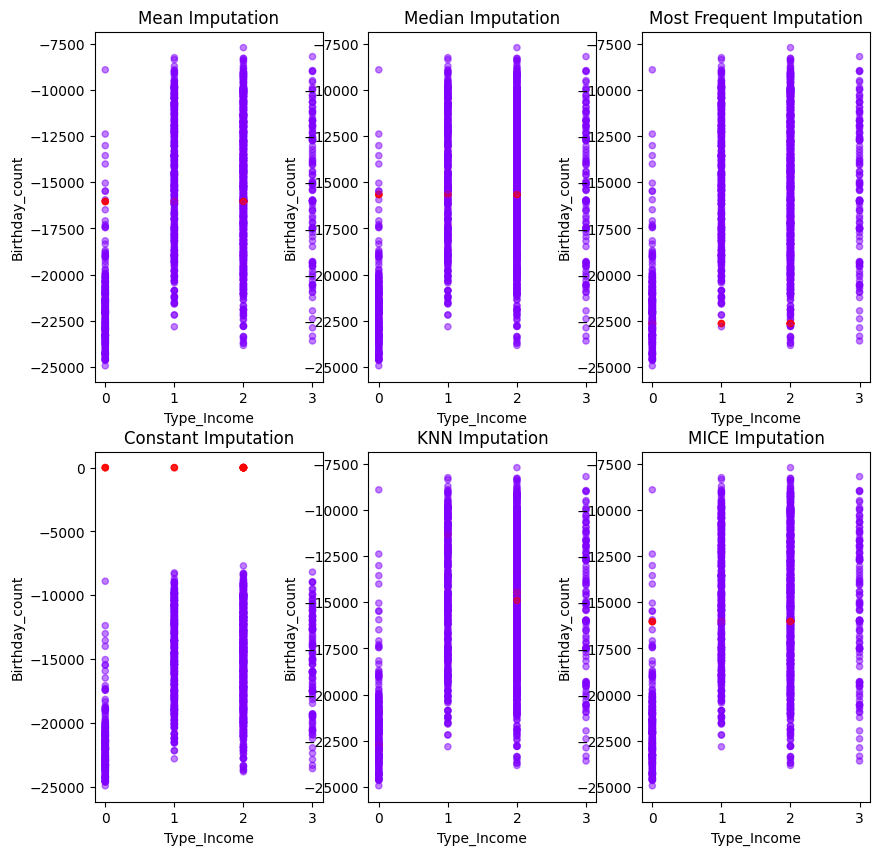

In [91]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10)) # creating 2 rows and 3 columns
nullity = newdf['Type_Income'].isnull() + newdf['Birthday_count'].isnull() # creating null columns between culmen length and culmen depth
imputations = {'Mean Imputation': data_mean, # creating a python dictionary
               'Median Imputation': data_median,
               'Most Frequent Imputation': data_mode,
               'Constant Imputation': data_constant,
               'KNN Imputation': data_knn,
              'MICE Imputation': data_MICE}

for ax, df_key in zip(axes.flatten(), imputations): # a for loop to iterate over the subplots and the imputed data
    imputations[df_key].plot(x='Type_Income', y='Birthday_count', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

*I want to see which techniques are covering the missing values from the above plot choosing two numerical variables for scatter plot.Here MICE is covering the missing values better than knn*

In [92]:
data_MICE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENDER          1548 non-null   float64
 1   Car_Owner       1548 non-null   float64
 2   Propert_Owner   1548 non-null   float64
 3   Type_Income     1548 non-null   float64
 4   EDUCATION       1548 non-null   float64
 5   Housing_type    1548 non-null   float64
 6   Birthday_count  1548 non-null   float64
 7   Employed_days   1548 non-null   float64
 8   Mobile_phone    1548 non-null   float64
 9   label           1548 non-null   float64
 10  Age             1548 non-null   float64
dtypes: float64(11)
memory usage: 145.1 KB


In [93]:
data_MICE.isnull().sum()

GENDER            0
Car_Owner         0
Propert_Owner     0
Type_Income       0
EDUCATION         0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
label             0
Age               0
dtype: int64

*Now we have no missing values after MICE imputation*

In [94]:
df=data_MICE.drop(["Car_Owner","Propert_Owner","EDUCATION","Birthday_count","Mobile_phone","Age"],axis=1)

In [95]:
df.head()

,GENDER,Type_Income,Housing_type,Employed_days,label
0,0.0,0.0,0.0,365243.0,1.0
1,1.0,1.0,0.0,-586.0,1.0
2,1.0,1.0,0.0,-586.0,1.0
3,1.0,1.0,0.0,-586.0,1.0
4,1.0,1.0,0.0,-586.0,1.0


In [96]:
X = df.iloc[:, :-1]

In [97]:
X.head()

,GENDER,Type_Income,Housing_type,Employed_days
0,0.0,0.0,0.0,365243.0
1,1.0,1.0,0.0,-586.0
2,1.0,1.0,0.0,-586.0
3,1.0,1.0,0.0,-586.0
4,1.0,1.0,0.0,-586.0


In [98]:
y = df.iloc[:, -1]

In [99]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1543    0.0
1544    0.0
1545    0.0
1546    0.0
1547    0.0
Name: label, Length: 1548, dtype: float64

**Splitting data into Training and Test data**

In [100]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [101]:
### To ignore warnings
import warnings 
warnings.filterwarnings('ignore')

### Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

In [102]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.343254
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.027     
Dependent Variable: label            AIC:              1070.7145 
Date:               2023-05-11 10:22 BIC:              1092.0933 
No. Observations:   1548             Log-Likelihood:   -531.36   
Df Model:           3                LL-Null:          -546.20   
Df Residuals:       1544             LLR p-value:      1.6053e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
GENDER           -0.5273   0.1565  -3.3688 0.0008 -0.8341 -0.2205
Type_Income      -1.1119   0.0736 -15.1096 0.0000 -1.2561 -0.9676


Based on the above result "Car_Owner","Propert_Owner","Education","Birthday_count","Mobile_phone" are not good predictor.We will do more cleaning based on the result.we can remove the variables whose p-value is greater than 0.05.

In [103]:
### random state train test split will be same with all people using random_state=16
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=16)

In [104]:
X_train.head()

,GENDER,Type_Income,Housing_type,Employed_days
132,1.0,0.0,3.0,365243.0
919,0.0,0.0,0.0,365243.0
1388,1.0,1.0,0.0,-1871.0
508,1.0,1.0,0.0,-793.0
1420,1.0,1.0,0.0,-2980.0


In [105]:
y_train.head()

132     1.0
919     0.0
1388    0.0
508     0.0
1420    0.0
Name: label, dtype: float64

In [106]:
X_test.head()

,GENDER,Type_Income,Housing_type,Employed_days
89,0.0,2.0,1.0,-1394.0
920,0.0,2.0,0.0,-2908.0
1439,1.0,2.0,0.0,-10762.0
1464,1.0,0.0,0.0,365243.0
1103,1.0,2.0,0.0,-5981.0


In [107]:
y_test.head()

89      1.0
920     0.0
1439    0.0
1464    0.0
1103    0.0
Name: label, dtype: float64

In [108]:
### both will have same shape
X_train.shape, y_train.shape

((1315, 4), (1315,))

In [109]:
### both will have same shape
X_test.shape, y_test.shape

((233, 4), (233,))

**Standaradisation/feature scaling the dataset**

In [110]:
### Crating a standard scaler object
scaler=StandardScaler()
scaler

StandardScaler()

In [111]:
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.7635832 , -1.72957265,  3.74109682,  2.22462086],
       [-1.31606141, -1.72957265, -0.30125513,  2.22462086],
       [ 0.7635832 , -0.5679853 , -0.30125513, -0.44364789],
       ...,
       [ 0.7635832 , -0.5679853 , -0.30125513, -0.48392842],
       [ 0.7635832 ,  0.59360206,  3.74109682, -0.51327753],
       [-1.31606141,  0.59360206, -0.30125513, -0.44987676]])

In [112]:
### here using transform only to avoid data leakage
### (training mean and training std will be used for standardisation when we use transform)
X_test=scaler.transform(X_test)
X_test

array([[-1.31606141,  0.59360206,  1.04619552, -0.44018094],
       [-1.31606141,  0.59360206, -0.30125513, -0.45118504],
       [ 0.7635832 ,  0.59360206, -0.30125513, -0.50826972],
       [ 0.7635832 , -1.72957265, -0.30125513,  2.22462086],
       [ 0.7635832 ,  0.59360206, -0.30125513, -0.47352031],
       [ 0.7635832 ,  0.59360206,  1.04619552, -0.45327102],
       [ 0.7635832 , -1.72957265, -0.30125513,  2.22462086],
       [ 0.7635832 , -0.5679853 , -0.30125513, -0.45119958],
       [ 0.7635832 , -0.5679853 , -0.30125513, -0.45995053],
       [ 0.7635832 ,  0.59360206, -0.30125513, -0.43414831],
       [ 0.7635832 ,  0.59360206, -0.30125513, -0.45689787],
       [ 0.7635832 , -0.5679853 , -0.30125513, -0.43229491],
       [ 0.7635832 , -1.72957265, -0.30125513,  2.22462086],
       [ 0.7635832 ,  0.59360206, -0.30125513, -0.4772053 ],
       [-1.31606141,  0.59360206, -0.30125513, -0.46766939],
       [-1.31606141,  0.59360206,  1.04619552, -0.44207068],
       [-1.31606141, -0.

**From The above observation,i want to classification yes/no ML Models to predict the good clients for the approval of the loan**

In [113]:
#importing libraries for random forest,knn classifier,support vector classifier and decision tree.
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix

In [114]:
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [115]:
from sklearn.metrics import f1_score, precision_score, recall_score

**Logistic Regression Model**






In [116]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)

In [117]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

** Using Above Model to get prediction for test data**

In [118]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

**PERFORMANCE METRICS**

*Confusion Matrix*

In [119]:

confusion_matrix=confusion_matrix(y_test, logistic_reg_pred)
confusion_matrix


array([[205,   0],
       [ 28,   0]])

**LOGISTIC REGRESSION ACCURACY SCORE**

In [120]:
### accuracy using accuracy_score
print("Logistic Regression Accuracy_score:",round(accuracy_score(y_test, logistic_reg_pred), 2))

Logistic Regression Accuracy_score: 0.88


*Prescision score*

In [121]:
print("Accuracy:",round(precision_score(y_test, logistic_reg_pred), 2))

Accuracy: 0.0


*Recall Score*

In [122]:
print("Recall Score:",round(recall_score(y_test, logistic_reg_pred), 2))

Recall Score: 0.0


*F-1 Score*

*Giving equal importance to falsely positive and falsely negative*

In [123]:
from sklearn.metrics import f1_score
print("F1 score:",round(f1_score(y_test, logistic_reg_pred), 2))

F1 score: 0.0


In [124]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, logistic_reg_pred)
auc

0.5

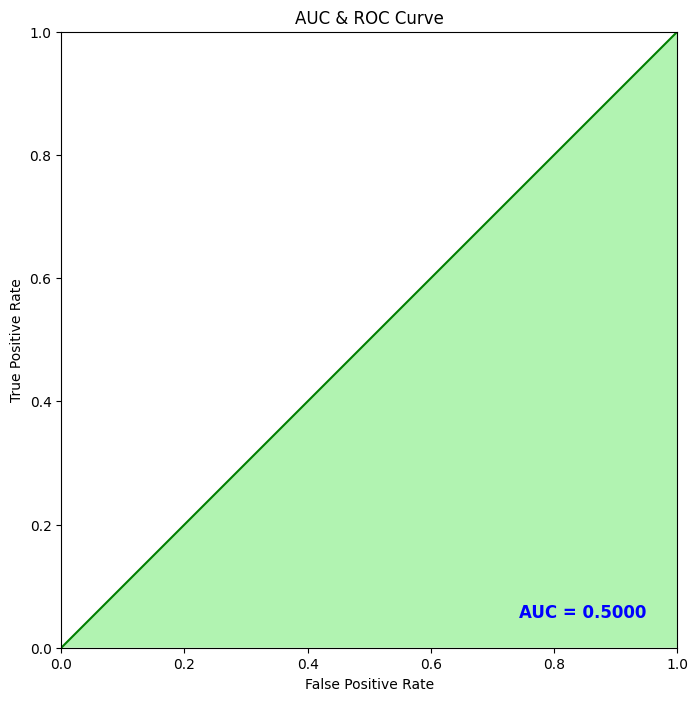

In [125]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logistic_reg_pred)
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

*This is just a model. Our accuracy of the model depends upon EDA and feature engineering tasks.*

**Log loss**

In [126]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, logistic_reg.predict_proba(X_test))
logloss

0.36667928562673563

**LETS CHECK ACCURACY FOR OTHER MODELS ALSO 

**2.DECISION TREE CLASSIFIER**

In [127]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

 we can use

In [128]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred=classification.predict(X_test)

**Confusion matrix**

In [129]:
# confusion_matrix(y_test,y_pred)
# array([[191,  14],
#      [ 18,  10]])

In [130]:
### accuracy using accuracy_score
print("Accuracy score of Decision tree ",round(accuracy_score(y_test, y_pred),2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, y_pred), 2))
print("Recall score",round(recall_score(y_test, y_pred), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,y_pred), 2))     

Accuracy score of Decision tree  0.87
Precision Score 0.43
Recall score 0.36
f1 score 0.39


**The above all scores we can calculate individullay or we can get results in a report form as shown in the below using classification report**

In [131]:
print(f"Decision tree training set accuracy:{format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy:{format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy:0.9726 
Decision tree testing set accuracy:0.8670 


**RANDOM FOREST CLASSIFIER**

In [132]:
from sklearn.ensemble import RandomForestClassifier
# Create Decision Tree classifer object
classification =  RandomForestClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred1 = classification.predict(X_test)

In [133]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       205
         1.0       0.47      0.32      0.38        28

    accuracy                           0.88       233
   macro avg       0.69      0.64      0.66       233
weighted avg       0.86      0.88      0.86       233



\**From the above report Random forest accuracy is 0.87**

**Or we calculate individually like this below**

In [134]:
conf_matrix= confusion_matrix(y_test, y_pred1)
print("confusion matrix:",conf_matrix)
### accuracy using accuracy_score
print("Accuracy score of random forest ",round(accuracy_score(y_test, y_pred1), 2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, y_pred1), 2))
print("Recall score",round(recall_score(y_test, y_pred1), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,y_pred1), 2)) 

confusion matrix: [[195  10]
 [ 19   9]]
Accuracy score of random forest  0.88
Precision Score 0.47
Recall score 0.32
f1 score 0.38


In [135]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred1)
auc

0.6363240418118467

**K-NEIGHBOURS CLASSIFIER (KNN CLASSIFIER)**

In [136]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

**Fitting K-NN classifier to the Training data:**

Now we will fit the K-NN classifier to the training data. To do this we will import the KNeighborsClassifier class of Sklearn Neighbors library. After importing the class, we will create the Classifier object of the class. The Parameter of this class will be

n_neighbors: To define the required neighbors of the algorithm. Usually, it takes 5.

metric='minkowski': This is the default parameter and it decides the distance between the points.

p=2: It is equivalent to the standard Euclidean metric. And then we will fit the classifier to the training data.**

In [137]:
#Predicting the test set result  
y_pred2= classifier.predict(X_test)  

In [138]:
y_pred2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [139]:
cm= confusion_matrix(y_test, y_pred2) 
print(cm)
score=accuracy_score(y_test, y_pred2)
print(score)

[[200   5]
 [ 27   1]]
0.8626609442060086


In [140]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       205
         1.0       0.17      0.04      0.06        28

    accuracy                           0.86       233
   macro avg       0.52      0.51      0.49       233
weighted avg       0.80      0.86      0.82       233



**KNN Classifier accuracy is 0.86**

**Cross validation of KNN classifier**

In [141]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [142]:
#Implementing cross validation
k = 5
kf = KFold(n_splits=k, random_state=None)
model = KNeighborsClassifier()
acc_score = []

In [143]:
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.43548387096774194, 0.8064516129032258, 0.7935483870967742, 0.7766990291262136, 0.8058252427184466]
Avg accuracy : 0.7236016285624804


**Comparing all the values from above performed Classifiers**

**Accuracy score for 4 ML models in which MICE imputation technique used for this data :**

*Logistic Regression Accuracy-score:0.88*

*Decision tree Accuracy-score:0.86*

*Random forest Accuracy-score:0.87*

*KNN classifier Accuracy-score=0.86*


**Finally based on my observations the Best accuracy among all ML models is Logistic regression model.**